In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files

# Upload the Kaggle API key JSON file
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marriumjilani","key":"7b46fd61e283b12571293db419d941c4"}'}

In [ ]:
import os

os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")

# setting permissions for the Kaggle configuration file
os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000


 99% 5.17G/5.20G [00:56<00:00, 128MB/s]
100% 5.20G/5.20G [00:57<00:00, 97.8MB/s]


In [ ]:
!unzip skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [ ]:
path='/content/hmnist_28_28_RGB.csv'

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [ ]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [ ]:
print(len(train_set))

8012


In [ ]:
print(len(test_set))

2003


In [ ]:
df.label.unique()

array([4, 5, 2, 6, 0, 1, 3])

In [ ]:

classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [ ]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

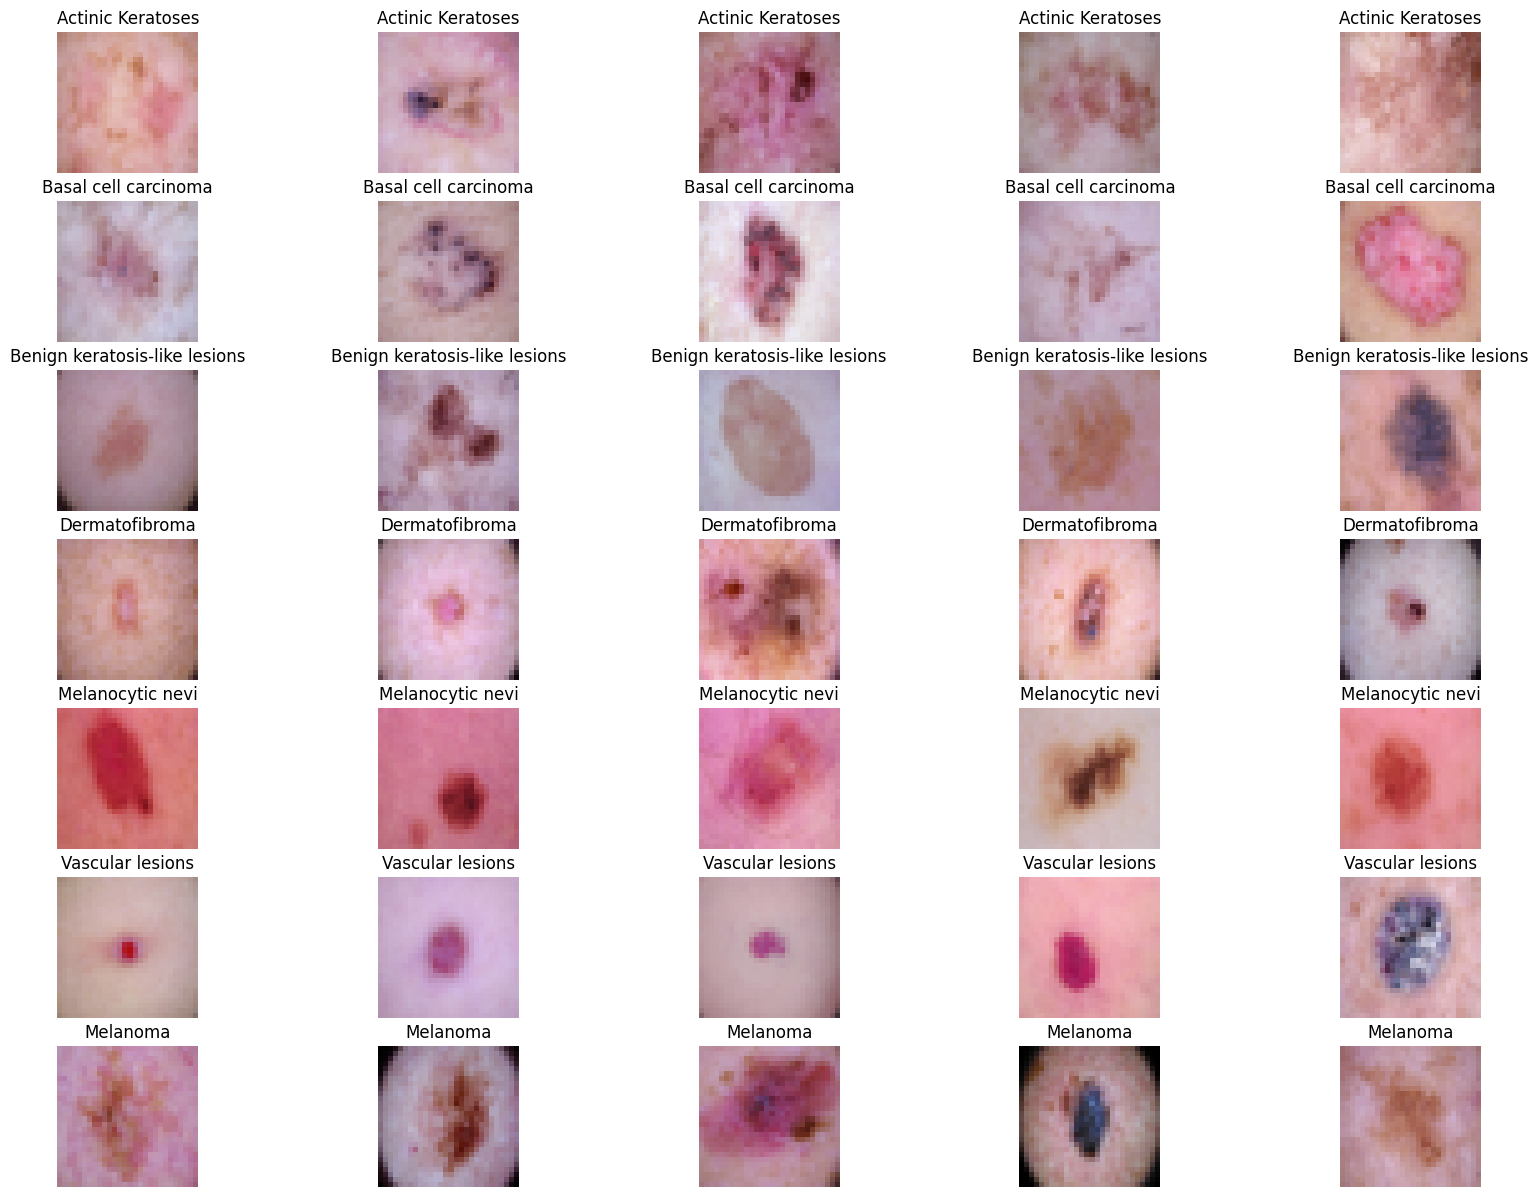

In [ ]:
# Create a dictionary to map class labels to class names
 # Set up subplots for each class

import matplotlib.pyplot as plt
import random

def show_samples(x_train, y_train, class_names, num_samples=5):

    class_labels = {
        0: 'Actinic Keratoses',
        1: 'Basal cell carcinoma',
        2: 'Benign keratosis-like lesions',
        3: 'Dermatofibroma',
        4: 'Melanocytic nevi',
        5: 'Vascular lesions',
        6: 'Melanoma'
    }

    fig, axes = plt.subplots(len(class_labels), num_samples, figsize=(20, 15))

    for i, class_name in enumerate(class_names):
        class_indices = [idx for idx, label in enumerate(y_train) if label == i]

        sampled_indices = random.sample(class_indices, num_samples)

        for j, index in enumerate(sampled_indices):
            image = x_train[index].reshape(28, 28, 3)
            axes[i, j].imshow(image)
            axes[i, j].set_title(class_labels[i])
            axes[i, j].axis('off')

    plt.show()

class_names = [0, 1, 2, 3, 4, 5, 6]
show_samples(x_train, y_train, class_names)


In [ ]:
#Building the CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [ ]:

model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_9 (Bat  (None, 14, 14, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 64)         

In [ ]:

callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',monitor='val_acc', mode='max',verbose=1, save_best_only=True)

In [ ]:

optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer =optimizer,metrics = ['accuracy'])


In [ ]:
#FITTING THE MODEL
history = model.fit(x_train,y_train, validation_split=0.2,batch_size = 128,epochs = 40,shuffle=True,callbacks=[callback])


Epoch 1/40
50/51 [============================>.] - ETA: 0s - loss: 1.8755 - accuracy: 0.3648

51/51 [==============================] - 14s 200ms/step - loss: 1.8747 - accuracy: 0.3651 - val_loss: 1.4330 - val_accuracy: 0.6650
Epoch 2/40
50/51 [============================>.] - ETA: 0s - loss: 1.3400 - accuracy: 0.6247

51/51 [==============================] - 9s 177ms/step - loss: 1.3402 - accuracy: 0.6244 - val_loss: 1.3094 - val_accuracy: 0.6656
Epoch 3/40
50/51 [============================>.] - ETA: 0s - loss: 1.1170 - accuracy: 0.6845

51/51 [==============================] - 10s 195ms/step - loss: 1.1169 - accuracy: 0.6847 - val_loss: 1.1413 - val_accuracy: 0.6750
Epoch 4/40
50/51 [============================>.] - ETA: 0s - loss: 0.9249 - accuracy: 0.7142

51/51 [==============================] - 10s 199ms/step - loss: 0.9255 - accuracy: 0.7138 - val_loss: 1.1453 - val_accuracy: 0.6750
Epoch 5/40
50/51 [============================>.] - ETA: 0s - loss: 0.8496 - accuracy: 0.7256

51/51 [==============================] - 10s 201ms/step - loss: 0.8494 - accuracy: 0.7255 - val_loss: 0.9037 - val_accuracy: 0.6931
Epoch 6/40
50/51 [============================>.] - ETA: 0s - loss: 0.7631 - accuracy: 0.7456

51/51 [==============================] - 10s 197ms/step - loss: 0.7635 - accuracy: 0.7455 - val_loss: 0.8601 - val_accuracy: 0.7006
Epoch 7/40
50/51 [============================>.] - ETA: 0s - loss: 0.7773 - accuracy: 0.7283

51/51 [==============================] - 9s 183ms/step - loss: 0.7773 - accuracy: 0.7282 - val_loss: 0.8882 - val_accuracy: 0.7031
Epoch 8/40
50/51 [============================>.] - ETA: 0s - loss: 0.7022 - accuracy: 0.7541

51/51 [==============================] - 10s 201ms/step - loss: 0.7016 - accuracy: 0.7544 - val_loss: 1.1468 - val_accuracy: 0.6376
Epoch 9/40
50/51 [============================>.] - ETA: 0s - loss: 0.6698 - accuracy: 0.7594

51/51 [==============================] - 10s 200ms/step - loss: 0.6709 - accuracy: 0.7591 - val_loss: 0.8329 - val_accuracy: 0.7286
Epoch 10/40
50/51 [============================>.] - ETA: 0s - loss: 0.6475 - accuracy: 0.7738

51/51 [==============================] - 10s 200ms/step - loss: 0.6476 - accuracy: 0.7738 - val_loss: 0.7483 - val_accuracy: 0.7399
Epoch 11/40
50/51 [============================>.] - ETA: 0s - loss: 0.6048 - accuracy: 0.7895

51/51 [==============================] - 10s 196ms/step - loss: 0.6045 - accuracy: 0.7897 - val_loss: 0.8393 - val_accuracy: 0.7330
Epoch 12/40
50/51 [============================>.] - ETA: 0s - loss: 0.5683 - accuracy: 0.7978

51/51 [==============================] - 13s 239ms/step - loss: 0.5693 - accuracy: 0.7976 - val_loss: 0.7764 - val_accuracy: 0.7449
Epoch 13/40
50/51 [============================>.] - ETA: 0s - loss: 0.5852 - accuracy: 0.7964

51/51 [==============================] - 10s 189ms/step - loss: 0.5856 - accuracy: 0.7961 - val_loss: 0.8126 - val_accuracy: 0.7392
Epoch 14/40
50/51 [============================>.] - ETA: 0s - loss: 0.5568 - accuracy: 0.8022

51/51 [==============================] - 10s 197ms/step - loss: 0.5584 - accuracy: 0.8017 - val_loss: 0.8270 - val_accuracy: 0.7399
Epoch 15/40
50/51 [============================>.] - ETA: 0s - loss: 0.5858 - accuracy: 0.8011

51/51 [==============================] - 10s 197ms/step - loss: 0.5866 - accuracy: 0.8011 - val_loss: 1.2921 - val_accuracy: 0.6956
Epoch 16/40
50/51 [============================>.] - ETA: 0s - loss: 0.8004 - accuracy: 0.7300

51/51 [==============================] - 10s 196ms/step - loss: 0.8002 - accuracy: 0.7301 - val_loss: 1.2647 - val_accuracy: 0.6313
Epoch 17/40
50/51 [============================>.] - ETA: 0s - loss: 0.7084 - accuracy: 0.7514

51/51 [==============================] - 10s 200ms/step - loss: 0.7084 - accuracy: 0.7514 - val_loss: 1.0251 - val_accuracy: 0.7080
Epoch 18/40
50/51 [============================>.] - ETA: 0s - loss: 0.6270 - accuracy: 0.7720

51/51 [==============================] - 9s 178ms/step - loss: 0.6275 - accuracy: 0.7719 - val_loss: 0.7587 - val_accuracy: 0.7492
Epoch 19/40
50/51 [============================>.] - ETA: 0s - loss: 0.5750 - accuracy: 0.7897

51/51 [==============================] - 10s 199ms/step - loss: 0.5765 - accuracy: 0.7892 - val_loss: 0.8318 - val_accuracy: 0.7436
Epoch 20/40
50/51 [============================>.] - ETA: 0s - loss: 0.5462 - accuracy: 0.8086

51/51 [==============================] - 10s 199ms/step - loss: 0.5460 - accuracy: 0.8086 - val_loss: 0.7364 - val_accuracy: 0.7436
Epoch 21/40
50/51 [============================>.] - ETA: 0s - loss: 0.5271 - accuracy: 0.8153

51/51 [==============================] - 10s 197ms/step - loss: 0.5268 - accuracy: 0.8153 - val_loss: 0.8844 - val_accuracy: 0.7261
Epoch 22/40
50/51 [============================>.] - ETA: 0s - loss: 0.4945 - accuracy: 0.8266

51/51 [==============================] - 10s 201ms/step - loss: 0.4947 - accuracy: 0.8267 - val_loss: 0.7630 - val_accuracy: 0.7498
Epoch 23/40
50/51 [============================>.] - ETA: 0s - loss: 0.5666 - accuracy: 0.8011

51/51 [==============================] - 10s 198ms/step - loss: 0.5666 - accuracy: 0.8011 - val_loss: 1.4551 - val_accuracy: 0.5983
Epoch 24/40
50/51 [============================>.] - ETA: 0s - loss: 0.4803 - accuracy: 0.8298

51/51 [==============================] - 9s 180ms/step - loss: 0.4814 - accuracy: 0.8295 - val_loss: 0.7967 - val_accuracy: 0.7455
Epoch 25/40
50/51 [============================>.] - ETA: 0s - loss: 0.4719 - accuracy: 0.8361

51/51 [==============================] - 10s 197ms/step - loss: 0.4723 - accuracy: 0.8359 - val_loss: 1.0638 - val_accuracy: 0.6538
Epoch 26/40
50/51 [============================>.] - ETA: 0s - loss: 0.4969 - accuracy: 0.8273

51/51 [==============================] - 10s 195ms/step - loss: 0.4970 - accuracy: 0.8274 - val_loss: 1.0763 - val_accuracy: 0.7124
Epoch 27/40
50/51 [============================>.] - ETA: 0s - loss: 0.3758 - accuracy: 0.8708

51/51 [==============================] - 10s 192ms/step - loss: 0.3767 - accuracy: 0.8703 - val_loss: 0.8226 - val_accuracy: 0.7517
Epoch 28/40
50/51 [============================>.] - ETA: 0s - loss: 0.3497 - accuracy: 0.8836

51/51 [==============================] - 10s 200ms/step - loss: 0.3508 - accuracy: 0.8833 - val_loss: 0.9231 - val_accuracy: 0.7099
Epoch 29/40
50/51 [============================>.] - ETA: 0s - loss: 0.3815 - accuracy: 0.8709

51/51 [==============================] - 10s 197ms/step - loss: 0.3822 - accuracy: 0.8708 - val_loss: 0.8050 - val_accuracy: 0.7480
Epoch 30/40
50/51 [============================>.] - ETA: 0s - loss: 0.2913 - accuracy: 0.9044

51/51 [==============================] - 9s 181ms/step - loss: 0.2916 - accuracy: 0.9042 - val_loss: 1.0275 - val_accuracy: 0.7193
Epoch 31/40
50/51 [============================>.] - ETA: 0s - loss: 0.4516 - accuracy: 0.8494

51/51 [==============================] - 10s 194ms/step - loss: 0.4529 - accuracy: 0.8493 - val_loss: 1.1739 - val_accuracy: 0.7149
Epoch 32/40
50/51 [============================>.] - ETA: 0s - loss: 0.3560 - accuracy: 0.8791

51/51 [==============================] - 10s 195ms/step - loss: 0.3582 - accuracy: 0.8783 - val_loss: 0.9861 - val_accuracy: 0.7293
Epoch 33/40
50/51 [============================>.] - ETA: 0s - loss: 0.3856 - accuracy: 0.8664

51/51 [==============================] - 10s 189ms/step - loss: 0.3852 - accuracy: 0.8666 - val_loss: 0.9505 - val_accuracy: 0.7342
Epoch 34/40
50/51 [============================>.] - ETA: 0s - loss: 0.2741 - accuracy: 0.9078

51/51 [==============================] - 10s 189ms/step - loss: 0.2742 - accuracy: 0.9078 - val_loss: 1.0951 - val_accuracy: 0.7187
Epoch 35/40
50/51 [============================>.] - ETA: 0s - loss: 0.2477 - accuracy: 0.9141

51/51 [==============================] - 10s 193ms/step - loss: 0.2489 - accuracy: 0.9137 - val_loss: 1.2346 - val_accuracy: 0.7174
Epoch 36/40
50/51 [============================>.] - ETA: 0s - loss: 0.2648 - accuracy: 0.9103

51/51 [==============================] - 9s 179ms/step - loss: 0.2659 - accuracy: 0.9101 - val_loss: 1.2076 - val_accuracy: 0.7149
Epoch 37/40
50/51 [============================>.] - ETA: 0s - loss: 0.2870 - accuracy: 0.8991

51/51 [==============================] - 9s 186ms/step - loss: 0.2878 - accuracy: 0.8989 - val_loss: 0.9139 - val_accuracy: 0.7542
Epoch 38/40
50/51 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.9133

51/51 [==============================] - 10s 194ms/step - loss: 0.2652 - accuracy: 0.9131 - val_loss: 1.4019 - val_accuracy: 0.6525
Epoch 39/40
50/51 [============================>.] - ETA: 0s - loss: 0.1830 - accuracy: 0.9378

51/51 [==============================] - 10s 188ms/step - loss: 0.1829 - accuracy: 0.9379 - val_loss: 1.0389 - val_accuracy: 0.7361
Epoch 40/40
50/51 [============================>.] - ETA: 0s - loss: 0.1354 - accuracy: 0.9589

51/51 [==============================] - 10s 198ms/step - loss: 0.1353 - accuracy: 0.9590 - val_loss: 1.0755 - val_accuracy: 0.7505


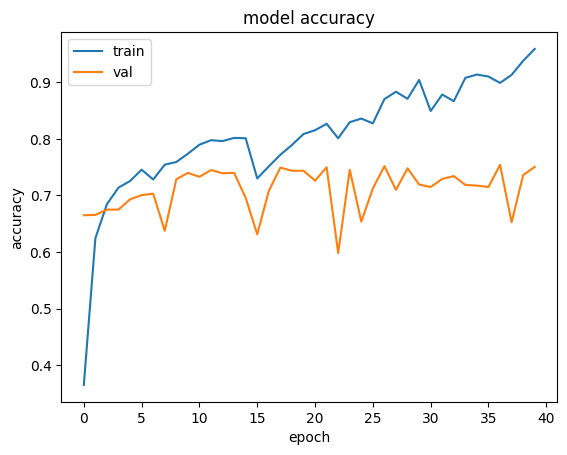

In [ ]:
#plot of accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Did early stopping. Model accuracy went from 80 to 95 %. tried various versions of the CNN model. RAM out of space issue.

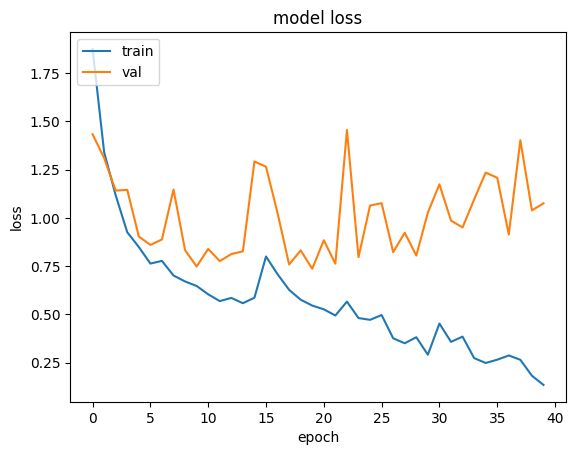

In [ ]:
#plot of loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('Skin Cancer Classification Model.h5')

In [ ]:
#Apply the trained model on test data
x_test=np.array(x_test).reshape(-1,28,28,3)
loss, acc = model.evaluate(x_test, y_test, verbose=1)

63/63 [==============================] - 1s 12ms/step - loss: 1.1192 - accuracy: 0.7494


63/63 [==============================] - 1s 13ms/step


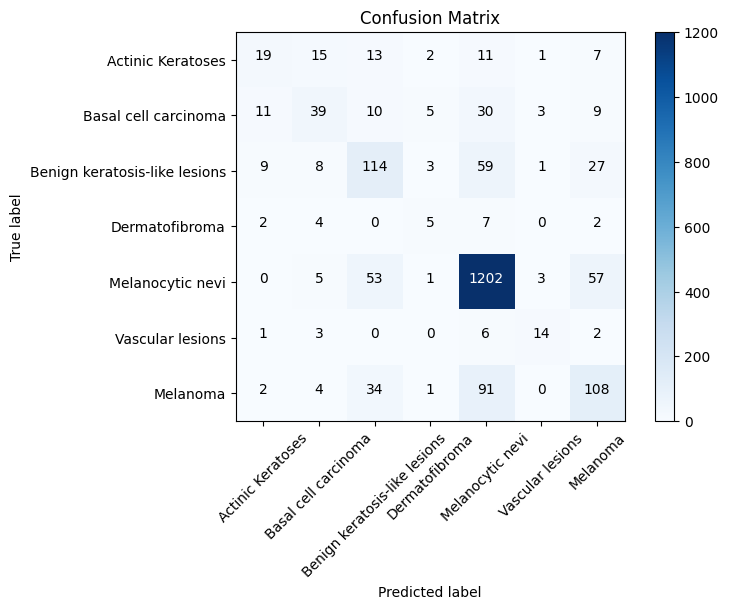

Accuracy: 0.7493759360958562
Precision: 0.5336527911502043
Recall: 0.47258758832834563
F1-Score: 0.4980430597737584


In [ ]:

# Calculate and Display the confusion matrix
# Calculate accuracy, precision, recall, and f1-score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)  # convert one-hot predictions to class labels

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

class_names = ['Actinic Keratoses',
               'Basal cell carcinoma',
               'Benign keratosis-like lesions',
               'Dermatofibroma',
               'Melanocytic nevi',
               'Vascular lesions',
               'Melanoma']

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


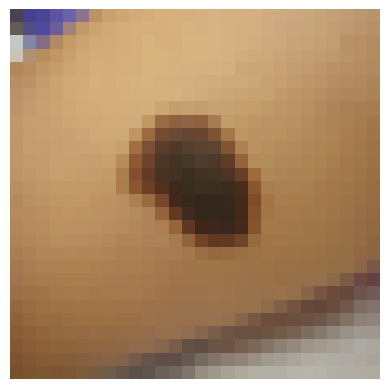

1/1 [==============================] - 0s 42ms/step
[1.2241670e-05 8.2455306e-05 2.4098592e-04 2.5632311e-05 9.9934441e-01
 3.8041464e-05 2.5625603e-04]
('nv', ' melanocytic nevi')


In [ ]:
#Instead of local host, for the time being i have taken an image from the web to get its predicted class

import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO

image_url = "https://www.dermatologyadvisor.com/wp-content/uploads/sites/20/2019/03/ch851.fig1_.jpg"

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
image = image.resize((28, 28))

img = np.array(image)

plt.imshow(img)
plt.axis('off')
plt.show()

img = x_test[1]
img = np.array(image).reshape(-1, 28, 28, 3)
result = model.predict(img)
print(result[0])
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])